# Lab 7 - Dynamic Programming - Power Plant

Information on group members:

1) 148279, Łukasz Kosturski <br>
2) Student ID, Name and last name

In [155]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
# from sympy import *
import numpy as np
from IPython.display import display

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task. 

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [156]:
z1, z2 = sym.symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [157]:
z1

<b> Defining an expression: </b>

In [158]:
2*z1 + (10-z2)**2

<b>Expanding the expression:</b>

In [159]:
sym.expand(2*z1 + (10-z2)**2)

<b> Simplifying the expression:</b>

In [160]:
e = sym.simplify(sym.expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e


<b> Substituting a variable with a value in the expression:</b>

In [161]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [162]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

<b> Finding a (partial) derivative: </b>

In [163]:
e = 2*z1 + (10-z2)**2
d = sym.diff(e, z2)

# the way of printing multiple lines of sympy objects
display(e)
display(d)

<b> Solving an equation: </b>

In [214]:
e = 2*z1 + (10-z2)**2
d = sym.diff(e, z2)
v = sym.solve(sym.Eq(d, 0), z2)
print(v)
type(v)

[10]


list

# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook. 

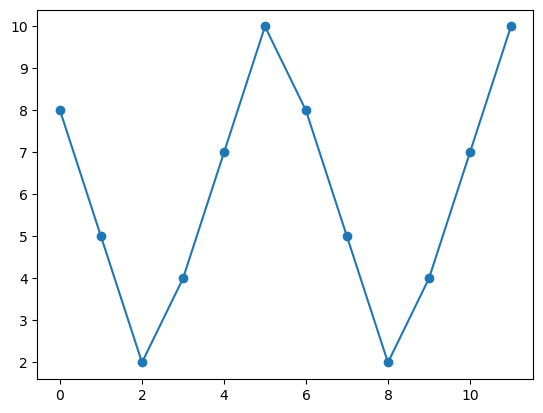

In [165]:
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds 
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]


plt.plot([i for i in range(12)], request + request, label='linear',marker='o')

plt.show()

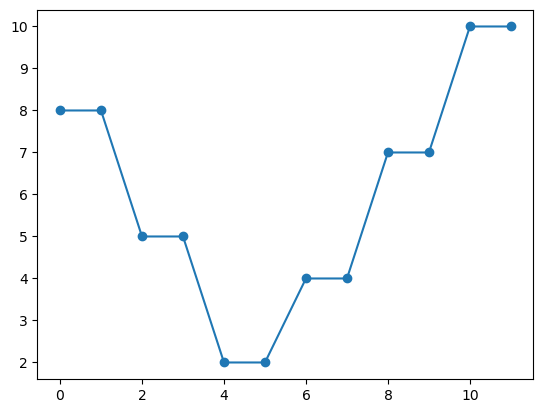

In [166]:

# CHyba ten wykres u góry nie pasuje do treści zadania
# ja bym to narysował tak: 
plt.plot([i for i in range(12)], np.array(request).repeat(2), label='linear',marker='o' )
plt.show()

<b> Cost: </b> Working above the required level - cost in a generic form:

In [167]:
xi, ri, mi1 = sym.symbols("x_i r_i m_{i1}") 
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r): 

In [168]:
x1 = sym.symbols("x1") 
c = cost_above.copy()
c = c.subs(xi, x1)
c = c.subs(mi1, 1)
c = c.subs(ri, 100)
c

Below are provided m parameter values for each month:

In [169]:
mv1 = [2, 8, 10, 12, 10, 6 ]

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [170]:
si, mi2, pi = sym.symbols("s_{i} m_{i2} p_i") 
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

In [171]:
si

Below are provided m and p parameter values for each month:

In [172]:
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5. 

In [180]:
# Data

# Stages - pairs of months
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]  # these map to stages s_i

# request - the minimal cost assignment for each period individually
request = [8,5,2,4,7,10]  # these map to required operating levels r_i

# bounds - solution space
### min requested operating level (1-10) + allowable bounds 
bounds = [[request[i], 10] for i in range(6)]

# costs of working above required level - coefficients
mv1 = [2, 8, 10, 12, 10, 6 ]

# costs of changing operating level - coefficients
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]



In [243]:
# creating symbols
m_above = [sym.symbols(f'm_{i}above') for i in range(6)]
m_change = [sym.symbols(f'm_{i}change') for i in range(6)]
p = [sym.symbols(f'p_{i}') for i in range(6)]

r = [sym.symbols(f'r_{i}') for i in range(6)]

s = [sym.symbols(f's_{i}') for i in range(6)]
x = [sym.symbols(f'x_{i}') for i in range(6)]
x_opt = [sym.symbols(f'x_{i}_opt') for i in range(6)]

f_opt = [sym.symbols(f'f_{i}_opt') for i in range(7)]  # we add artificial stage7

f = [m_change[i] * (x[i] - s[i])**p[i] + m_above[i] * (x[i] - r[i])  + f_opt[i+1] for i in range(6)]


f[5]

In [244]:
# The cost at stage i:
# f_i = cost_of_change_of_operational_level + cost_of_working_above_required_level

# the minimal cost at stage i:
# f_opt_i = min(over_all_possible_operating_levels) of {
#               cost_of_change of_operational_level + optimal}


# the artificial stage_6 depends on the decision at stage_5 (x_5) which has to be equal 10
f_opt[6] = 0 # 
x_opt[5] = 10


# f[5] = f[5].evalf(subs={x[5]: x_opt[5]}) # We already know the optimal value for x_5
# x[5] = 10

for i in range(5,-1,-1):
    print(f'i={i}')

    # f[i] = f[i].subs()
    
    print(f'Cost function at {months[i]}')
    display(f[i])
    
    f[i] = f[i].subs([
        (f'f_{i+1}_opt', f_opt[i+1]),
        (f'm_{i}above', mv1[i]),
        (f'm_{i}change', mv2[i]),
        (f'p_{i}', pv[i]), 
        (f'r_{i}', request[i])

        
    ])

    display(f[i])

    print(f'substituting {s[i]} with {x[i-1]}')
    f[i] = f[i].subs(f's_{i}', f'x_{(i-1)%6}')  # FIXME? : loop the first and the last stage
    display(f[i])

    # computing optimal x_i

    # if optimal x_i is not yet known
    if type(x_opt[i]) not in (int, float):

        print(f'computing optimal {x[i]}:\n First derivaive:')
        d_fi__d_xi = sym.diff(f[i], x[i])
        display(d_fi__d_xi)

        # checking if the function f[i] is convex:
        print('Second derivative - convexity check')
        d2_fi__d2_xi = sym.diff(d_fi__d_xi, x[i])
        display(d2_fi__d2_xi)
        if d2_fi__d2_xi < 0:
            raise RuntimeError('Function is not convex. Cannot find the minimum.')
        
        # TODO : check if x is inside the boundary
        print(f'optimal {x[i]}:')
        x_opt[i] = sym.solve(sym.Eq(d_fi__d_xi, 0), f'x_{i}')[0]
        display(x_opt[i])
    

        f_opt[i] = f[i].subs(f'x_{i}', x_opt[i])
        
        display(f_opt[i])
    
    else:
        print(f'f_opt:')
        f_opt[i] = f[i].evalf(subs={x[i]: x_opt[i]}) # We already know the optimal value for x_5
        display(f_opt[i])

    if i==0:
        final_result = f_opt[i].evalf(subs={x[(i-1)%6]: x_opt[(i-1)%6]})

        display(final_result)
    

    print('------------')


    

    



    
    
    

    

i=5
Cost function at Nov-Dec


substituting s_5 with x_4


f_opt:


------------
i=4
Cost function at Sep-Oct


substituting s_4 with x_3


computing optimal x_4:
 First derivaive:


Second derivative - convexity check


optimal x_4:


------------
i=3
Cost function at Jul-Aug


substituting s_3 with x_2


computing optimal x_3:
 First derivaive:


Second derivative - convexity check


optimal x_3:


------------
i=2
Cost function at May-Jun


substituting s_2 with x_1


computing optimal x_2:
 First derivaive:


Second derivative - convexity check


optimal x_2:


------------
i=1
Cost function at Mar-Apr


substituting s_1 with x_0


computing optimal x_1:
 First derivaive:


Second derivative - convexity check


optimal x_1:


------------
i=0
Cost function at Jan-Feb


substituting s_0 with x_5


computing optimal x_0:
 First derivaive:


Second derivative - convexity check


optimal x_0:


------------
